## Exercice 1

L’objectif de cet exercice est d’analyser les prix des Diamonds en fonction de leurs
caractéristiques. Nous disposons d’un fichier diamonds.csv dans la description est la suivante
(https://ggplot2.tidyverse.org/reference/diamonds.html#format )
- Price : price in US dollars (\$326--\$18,823)
- Carat : weight of the diamond (0.2--5.01)
- Cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- Color : diamond colour, from J (worst) to D (best)
- Clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1,
- IF (best))
- x : length in mm (0--10.74)
- y : width in mm (0--58.9)
- z : depth in mm (0--31.8)
- depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table : width of top of diamond relative to widest point (43--95)


A partir du fichier diamonds.csv fourni, analyser les données suivant le déroulement classique

    - Description de chaque variable
    - Recherche des liens entre le prix (price) et les autres variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Tests:

In [4]:
print("valeur min = " + str(min(df['carat'])))

valeur min = 0.2


In [5]:
print(max(df['carat']))

5.01


In [6]:
df['carat'].mean()

0.7979397478679852

In [7]:
df['carat'].median()

0.7

C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

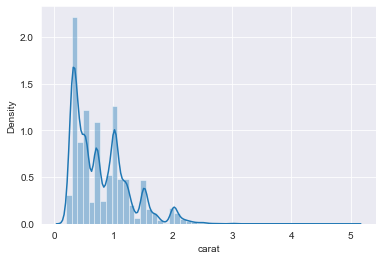

In [8]:
sns.distplot(df['carat'])

Détermination des stats de chaques paramètres

    Fonction afin de chercher les stats basiques des colonnes:

In [9]:
def getStatsColumn(dfcol):
    print("valeur min = " + str(min(dfcol)))
    print("valeur max = " + str(max(dfcol)))
    print("valeur moyenne = " + str(dfcol.mean()))
    print("valeur mediane = " + str(dfcol.median()))
    sns.distplot(dfcol)

valeur min = 0.2
valeur max = 5.01
valeur moyenne = 0.7979397478679852
valeur mediane = 0.7


C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


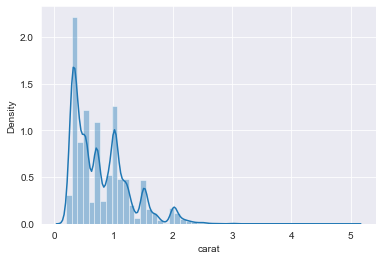

In [10]:
getStatsColumn(df['carat'])

    On observe qu'un carat élevé est rare : moyenne légerement plus élevé que la médiane et valeur max beaucoup plus élevé que la moyenne. Rareté étant souvent lié à valeur, on peut garder la possibilité que un haut carat entraîne un prix haut.

valeur min = 326
valeur max = 18823
valeur moyenne = 3932.799721913237
valeur mediane = 2401.0


C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


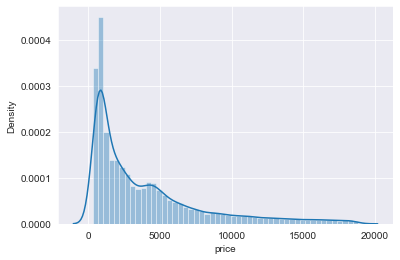

In [11]:
getStatsColumn(df['price'])

    On observe pour le prix un nombre beaucoup plus important de diamant "de bas prix" et les prix élevé plus rare. Ce qui fait le prix doit donc bien être un facteur rare et difficile à avoir.

valeur min = 43.0
valeur max = 79.0
valeur moyenne = 61.74940489432624
valeur mediane = 61.8


C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


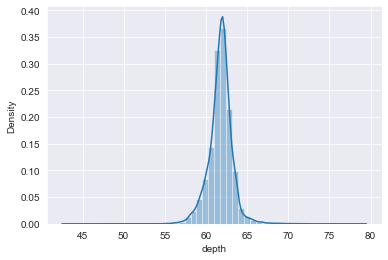

In [12]:
getStatsColumn(df['depth'])

    La répartition obtenue est une gaussiène. On peut supposer que ce critère ne sera pas exploitable afin de déterminer s'il y aura un impact sur le prix.

valeur min = 43.0
valeur max = 95.0
valeur moyenne = 57.45718390804603
valeur mediane = 57.0


C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


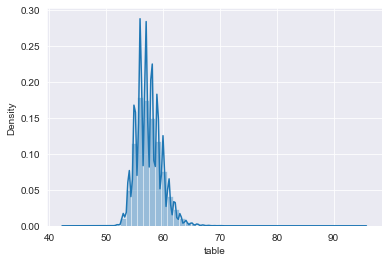

In [13]:
getStatsColumn(df['table'])

    Comme préédemment, nous obtenons une gaussiène. Paramètre non exploitable.

valeur min = 0.0
valeur max = 3840.5980600000003
valeur moyenne = 129.84940333672324
valeur mediane = 114.80857200000001


C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


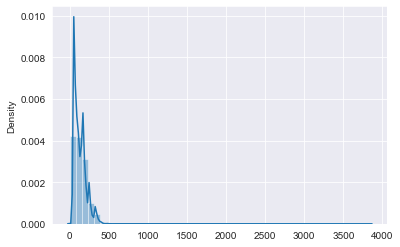

In [14]:
getStatsColumn(df['x']*df['y']*df['z'])

    On voit que la valeur max est très éloignée de la valeur moyenne, et que plusieurs valeurs sont effectivement bien plus élevées que les autres. Il est donc rare d'avoir des gros diamants. Rareté -> Prix élevé. Et par la logique, un gros diamant doit effectivement être plus chère.

<AxesSubplot:xlabel='cut', ylabel='Count'>

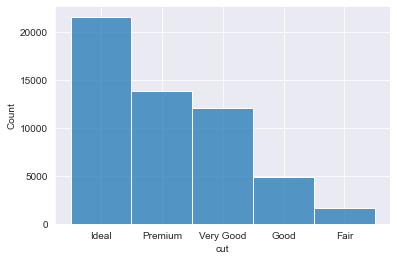

In [15]:
sns.histplot(df['cut'])

    On observe un nombre beaucoup plus important de diamants ideal. Logiquement, un diamant ideal sera plus chère lors de la vente. Un diamant de qualité fair devrait plutôt être un diamant bas de gamme. Cette donnée n'est sûrement pas optimal pour établir ce qui fait le prix élevé d'un diamant.

<AxesSubplot:xlabel='color', ylabel='Count'>

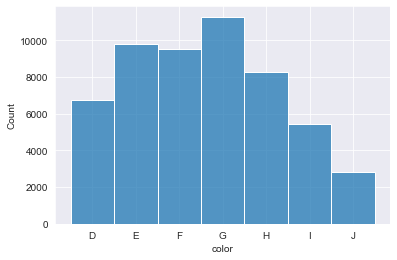

In [16]:
sns.histplot(df['color'])

    Pour la différence la plus élevé, on voit un facteur 3 entre la couleur G et J. J pourrait dans une certaine mesure augmenter la valeur d'un diamant

<AxesSubplot:xlabel='clarity', ylabel='Count'>

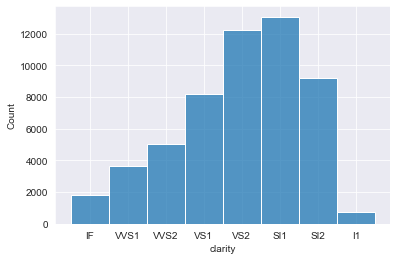

In [17]:
sns.histplot(df['clarity'])

    IF est la clarité considéré comme étant la meilleur. On observe avec ce dataset que c'est également un facteur assez rare. Il est trop probable que la clarité à également un rôle à jouer dans le prix d'un diamant.

Résumé :

Des analyses précédantes, on peut supposer que les facteurs suivants ont plus ou moins un rôle à jouer dans la valeur d'un diamant :
    - Carat
    - Volume
    - Clareté
    - Couleur

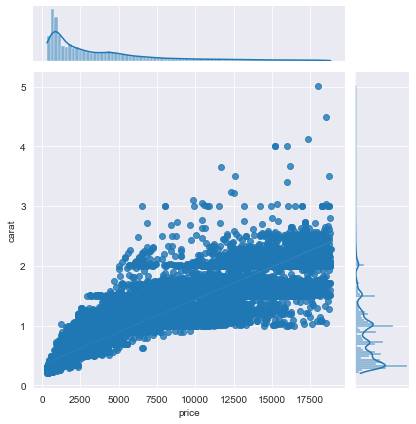

In [18]:
sns.jointplot(x='price',y='carat',data=df,kind='reg')

On observe que tout diamants de 5, 4... carats auront un prix élevé. Cependant, des diamants de 1 ou 2 carats ont également un prix tout autant élevé.
Le carat entraîne donc un prix élevé, mais n'est pas une condition ou l'unique facteur. Pour vérifier et confirmer notre hypothèse, on peut utiliser une heatmap de corrélation :

<AxesSubplot:>

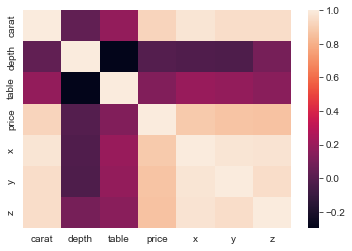

In [20]:
sns.heatmap(df.corr())

On voit effectivement que les paramètres supposés sont bien ceux faisant davantage le prix.